In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skbio 
import seaborn as sns
sns.set()
import scipy.stats as stats
from skbio.stats import subsample_counts

In [24]:
data = pd.read_csv('/Users/sveerisetti/Desktop/interesting.csv').dropna(1)
data.rename(columns = {'Sample ID':'Sample_ID', 'Total 16S copies':'Total_16s_Reads'}, inplace=True)

data

/var/folders/qj/q80cnm5j5mgd448km33pk9vw0000gn/T/ipykernel_39848/1135753998.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data = pd.read_csv('/Users/sveerisetti/Desktop/interesting.csv').dropna(1)


,Sample_ID,Total_16s_Reads,Alpha 2.1,Bartonella,Bifidobacterium,Lactobacillus Firm_4,Lactobacillus Firm_5,Frischella,Fructobacillus,Gilliamella,Gluconobacter,Klebsiella,Lactobacillus kunkeei,Serratia,Snodgrassella,Halomonadaceae
0,T1_D3,8070000,3228,163014,1010364,242100,647214,12912,1614,5920152,0,6456,12912,0,50034,0
1,T10_D3,2270000,5448,454,2724,44038,48578,1660732,22700,471706,0,0,1362,454,6356,5448
2,T11_D3,45500000,9100,0,464100,2584400,11793600,254800,9100,29220100,9100,0,18200,9100,1128400,0
3,T13_D3,5850000,10530,3510,21060,49140,127530,5850,25740,30420,541710,1170,33930,4627350,5850,366210
4,T14_D3,20100000,0,8040,257280,410040,3931560,4020,0,104520,7018920,0,6444060,0,1913520,8040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,C5_D3,146000000,1080400,1810400,13870000,9665200,77380000,0,292000,19534800,0,0,0,0,22367200,0
110,C6_D3,63100000,0,593140,3028800,2057060,19232880,0,25240,6751700,50480,0,12620,0,31348080,0
111,C7_D3,66100000,925400,251180,4177520,6411700,33274740,0,185080,14277600,26440,0,0,0,6570340,0
112,C8_D3,123000000,0,123000,10479600,3886800,63197400,49200,24600,24796800,0,98400,0,0,20344200,0


In [25]:
#Here we want to create a new column where we can seperate each sample based on the Day. We can append the Day value to a new column named Day
conditions = [
    (data['Sample_ID'].str.contains("D0")),
    (data['Sample_ID'].str.contains("D1")),
    (data['Sample_ID'].str.contains("D2")),
    (data['Sample_ID'].str.contains("D3")),
    (data['Sample_ID'].str.contains("D4")),
    (data['Sample_ID'].str.contains("D5")),
    (data['Sample_ID'].str.contains("D6")),
    (data['Sample_ID'].str.contains("D7")),
    
    ]

# Here we create a list of the values we want to assign for each condition
values = ["0", "1", '2', '3', '4', '5', '6', '7']

# create a new column and use np.select to assign values to it using our lists as arguments
data['Day'] = np.select(conditions, values)
Day = data.Day

#Display
data

,Sample_ID,Total_16s_Reads,Alpha 2.1,Bartonella,Bifidobacterium,Lactobacillus Firm_4,Lactobacillus Firm_5,Frischella,Fructobacillus,Gilliamella,Gluconobacter,Klebsiella,Lactobacillus kunkeei,Serratia,Snodgrassella,Halomonadaceae,Day
0,T1_D3,8070000,3228,163014,1010364,242100,647214,12912,1614,5920152,0,6456,12912,0,50034,0,3
1,T10_D3,2270000,5448,454,2724,44038,48578,1660732,22700,471706,0,0,1362,454,6356,5448,3
2,T11_D3,45500000,9100,0,464100,2584400,11793600,254800,9100,29220100,9100,0,18200,9100,1128400,0,3
3,T13_D3,5850000,10530,3510,21060,49140,127530,5850,25740,30420,541710,1170,33930,4627350,5850,366210,3
4,T14_D3,20100000,0,8040,257280,410040,3931560,4020,0,104520,7018920,0,6444060,0,1913520,8040,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,C5_D3,146000000,1080400,1810400,13870000,9665200,77380000,0,292000,19534800,0,0,0,0,22367200,0,3
110,C6_D3,63100000,0,593140,3028800,2057060,19232880,0,25240,6751700,50480,0,12620,0,31348080,0,3
111,C7_D3,66100000,925400,251180,4177520,6411700,33274740,0,185080,14277600,26440,0,0,0,6570340,0,3
112,C8_D3,123000000,0,123000,10479600,3886800,63197400,49200,24600,24796800,0,98400,0,0,20344200,0,3


In [26]:
#Here we want to create a new column where we can seperate each sample based on the Group. We can append the Group name to a new column named Group
conditions = [
    (data['Sample_ID'].str.contains("C") & data['Sample_ID'].str.contains("D1")),
    (data['Sample_ID'].str.contains("T") & data['Sample_ID'].str.contains("D1")), 
    (data['Sample_ID'].str.contains("C") & data['Sample_ID'].str.contains("D2")),
    (data['Sample_ID'].str.contains("T") & data['Sample_ID'].str.contains("D2")), 
    (data['Sample_ID'].str.contains("C") & data['Sample_ID'].str.contains("D3")),
    (data['Sample_ID'].str.contains("T") & data['Sample_ID'].str.contains("D3")), 
    (data['Sample_ID'].str.contains("C") & data['Sample_ID'].str.contains("D4")),
    (data['Sample_ID'].str.contains("T") & data['Sample_ID'].str.contains("D4")),
    (data['Sample_ID'].str.contains("C") & data['Sample_ID'].str.contains("D5")),
    (data['Sample_ID'].str.contains("T") & data['Sample_ID'].str.contains("D5")),
    (data['Sample_ID'].str.contains("C") & data['Sample_ID'].str.contains("D6")),
    (data['Sample_ID'].str.contains("T") & data['Sample_ID'].str.contains("D6")), 
    (data['Sample_ID'].str.contains("C") & data['Sample_ID'].str.contains("D7")),
    (data['Sample_ID'].str.contains("T") & data['Sample_ID'].str.contains("D7")),  
    ]

# create a list of the values we want to assign for each condition
values = ["Control1", "Treatment1", "Control2", "Treatment2", "Control3", "Treatment3", "Control4", "Treatment4", "Control5", "Treatment5", 
         "Control6", "Treatment6", "Control7", "Treatment7"]

# create a new column and use np.select to assign values to it using our lists as arguments
data['Group'] = np.select(conditions, values)

#Display
data

,Sample_ID,Total_16s_Reads,Alpha 2.1,Bartonella,Bifidobacterium,Lactobacillus Firm_4,Lactobacillus Firm_5,Frischella,Fructobacillus,Gilliamella,Gluconobacter,Klebsiella,Lactobacillus kunkeei,Serratia,Snodgrassella,Halomonadaceae,Day,Group
0,T1_D3,8070000,3228,163014,1010364,242100,647214,12912,1614,5920152,0,6456,12912,0,50034,0,3,Treatment3
1,T10_D3,2270000,5448,454,2724,44038,48578,1660732,22700,471706,0,0,1362,454,6356,5448,3,Treatment3
2,T11_D3,45500000,9100,0,464100,2584400,11793600,254800,9100,29220100,9100,0,18200,9100,1128400,0,3,Treatment3
3,T13_D3,5850000,10530,3510,21060,49140,127530,5850,25740,30420,541710,1170,33930,4627350,5850,366210,3,Treatment3
4,T14_D3,20100000,0,8040,257280,410040,3931560,4020,0,104520,7018920,0,6444060,0,1913520,8040,3,Treatment3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,C5_D3,146000000,1080400,1810400,13870000,9665200,77380000,0,292000,19534800,0,0,0,0,22367200,0,3,Control3
110,C6_D3,63100000,0,593140,3028800,2057060,19232880,0,25240,6751700,50480,0,12620,0,31348080,0,3,Control3
111,C7_D3,66100000,925400,251180,4177520,6411700,33274740,0,185080,14277600,26440,0,0,0,6570340,0,3,Control3
112,C8_D3,123000000,0,123000,10479600,3886800,63197400,49200,24600,24796800,0,98400,0,0,20344200,0,3,Control3


In [27]:
data['Bee'] = data.Sample_ID.apply(lambda x: x.split('_')[0][1:])
data = data.set_index('Sample_ID')
group = data.Group

In [28]:
data = data.drop(['Group'], axis = 1)
data = data.drop(['Day'], axis = 1)
data = data.drop(['Bee'], axis = 1)
data = data.drop(['Total_16s_Reads'], axis = 1)

In [13]:
def SDI(x):
    "https://en.wikipedia.org/wiki/Diversity_index"
    # Get proportions (relative abundance)
    p = x / x.sum()
    return -sum(p*np.log2(p))

#In R there is already a function that does this: diversity(). Potentially save df and use R to calculate shannon index values? 

In [29]:
#Here we want to you scibio kit in order to use the alpha shannon function. The function is applied to the dataframe and the values are then 
#appended to a new column called Shannon_Index

data['Shannon_Index'] = data.apply(skbio.diversity.alpha.shannon, axis=1)
data

,Alpha 2.1,Bartonella,Bifidobacterium,Lactobacillus Firm_4,Lactobacillus Firm_5,Frischella,Fructobacillus,Gilliamella,Gluconobacter,Klebsiella,Lactobacillus kunkeei,Serratia,Snodgrassella,Halomonadaceae,Shannon_Index
Sample_ID,,,,,,,,,,,,,,,
T1_D3,3228,163014,1010364,242100,647214,12912,1614,5920152,0,6456,12912,0,50034,0,1.351005
T10_D3,5448,454,2724,44038,48578,1660732,22700,471706,0,0,1362,454,6356,5448,1.184855
T11_D3,9100,0,464100,2584400,11793600,254800,9100,29220100,9100,0,18200,9100,1128400,0,1.406210
T13_D3,10530,3510,21060,49140,127530,5850,25740,30420,541710,1170,33930,4627350,5850,366210,1.205378
T14_D3,0,8040,257280,410040,3931560,4020,0,104520,7018920,0,6444060,0,1913520,8040,2.085622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C5_D3,1080400,1810400,13870000,9665200,77380000,0,292000,19534800,0,0,0,0,22367200,0,2.019118
C6_D3,0,593140,3028800,2057060,19232880,0,25240,6751700,50480,0,12620,0,31348080,0,1.818635
C7_D3,925400,251180,4177520,6411700,33274740,0,185080,14277600,26440,0,0,0,6570340,0,2.030398


In [30]:
#We want to add the group df that we saved earlier. We need the group so that we can plot the boxplots. 
data = pd.concat([data, group], axis=1)
data['Sample_ID'] = data.index

In [31]:
#There are unfilled rows that are not assigned to a group. Here, based on the Sample_ID, we want to assign the row to either Control0 or Treatment0
data.iloc[[72,73,74,75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85],[15]] = 'Control0'

In [32]:
data.iloc[[85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100],[15]] = 'Treatment0'

In [33]:
data.iloc[[71],[15]] = 'Control0'

In [34]:
#For Control/Treatment Group Formation
conditions = [
    (data['Sample_ID'].str.contains("C")),
    (data['Sample_ID'].str.contains("T"))
    ]

#Here we create a list of the values we want to assign for each condition
values = ["C", "T"]

#Here we create a new column and use np.select to assign values to it using our lists as arguments
data['Variable'] = np.select(conditions, values)

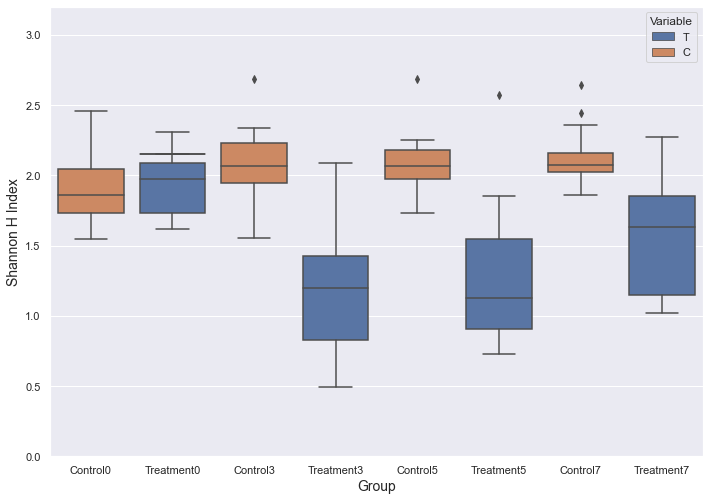

In [35]:
#Here we want to use seaborn in order to produce our histograms 
figure = sns.boxplot(data= data,
                     x= "Group", y= "Shannon_Index", hue = 'Variable', dodge=False, 
                     order=["Control0", "Treatment0", "Control3", "Treatment3", 'Control5', 'Treatment5' ,'Control7', 'Treatment7'])
figure.set_xlabel("Group", fontsize=14)
figure.set_ylabel("Shannon H Index", fontsize=14)
figure.set(ylim=(0, 3.2))
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [60]:
#data.to_csv('/Users/sveerisetti/Desktop/trial.csv')